# Self-Driving Car Engineer Nanodegree


## Project: **Advanced Lane Lines** 
In this project, your goal is to write a software pipeline to identify the lane boundaries in a video, but the main output or product we want you to create is a detailed writeup of the project.  Check out the [writeup template](https://github.com/udacity/CarND-Advanced-Lane-Lines/blob/master/writeup_template.md) for this project and use it as a starting point for creating your own writeup.  


The Project
---

The goals / steps of this project are the following:

* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Apply a distortion correction to raw images.
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

The images for camera calibration are stored in the folder called `camera_cal`.  The images in `test_images` are for testing your pipeline on single frames.  If you want to extract more test images from the videos, you can simply use an image writing method like `cv2.imwrite()`, i.e., you can read the video in frame by frame as usual, and for frames you want to save for later you can write to an image file.  

To help the reviewer examine your work, please save examples of the output from each stage of your pipeline in the folder called `output_images`, and include a description in your writeup for the project of what each image shows.    The video called `project_video.mp4` is the video your pipeline should work well on.  

The `challenge_video.mp4` video is an extra (and optional) challenge for you if you want to test your pipeline under somewhat trickier conditions.  The `harder_challenge.mp4` video is another optional challenge and is brutal!

If you're feeling ambitious (again, totally optional though), don't stop there!  We encourage you to go out and take video of your own, calibrate your camera and show us how you would implement this project from scratch!


## Import Packages

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

## Compute the camera calibration matrix and distortion coefficients

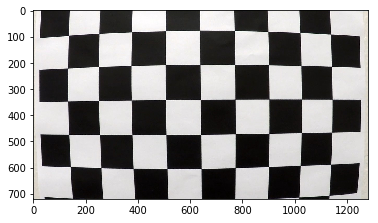

In [2]:

img = mpimg.imread("camera_cal/calibration1.jpg")
plt.imshow(img)

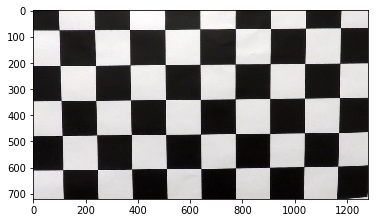

In [3]:
objpoints = []
imgpoints = []

nx = 9
ny = 5

objp = np.zeros((ny*nx, 3), np.float32)
objp[:,:2] = np.mgrid[0:nx, 0:ny].T.reshape(-1,2)

#convet to gray
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

#copy img
img_copy = np.copy(img)

#find chess board corners
ret, corners = cv2.findChessboardCorners(gray, (nx,ny),None)

if ret == True:
    objpoints.append(objp)
    imgpoints.append(corners)
    
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    plt.imshow(undist)
    #img_copy = cv2.drawChessboardCorners(img, (nx, ny), corners, ret)
    #plt.imshow(img_copy)
else:
    print("failed!")
    plt.imshow(img)

    

In [4]:
# func to Compute the camera calibration matrix and distortion coefficients
def cal_camera_para(imgs_dir, nx, ny):
    objpoints = []
    imgpoints = []

    objp = np.zeros((ny*nx, 3), np.float32)
    objp[:,:2] = np.mgrid[0:nx, 0:ny].T.reshape(-1,2)

    for img_dir in imgs_dir:
        img = mpimg.imread("camera_cal/"+img_dir)
        #convet to gray
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

        #copy img
        img_copy = np.copy(img)
        #find chess board corners
        ret, corners = cv2.findChessboardCorners(gray, (nx,ny),None)

        if ret == True:
            objpoints.append(objp)
            imgpoints.append(corners)
    
            #ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
            #undist = cv2.undistort(img, mtx, dist, None, mtx)
            #plt.imshow(undist)

    return objpoints,imgpoints


test cal_camera func

In [5]:
import os
images_dir = os.listdir("camera_cal/")
print(images_dir)
print("camera_cal/"+images_dir[0])

['calibration1.jpg', 'calibration10.jpg', 'calibration11.jpg', 'calibration12.jpg', 'calibration13.jpg', 'calibration14.jpg', 'calibration15.jpg', 'calibration16.jpg', 'calibration17.jpg', 'calibration18.jpg', 'calibration19.jpg', 'calibration2.jpg', 'calibration20.jpg', 'calibration3.jpg', 'calibration4.jpg', 'calibration5.jpg', 'calibration6.jpg', 'calibration7.jpg', 'calibration8.jpg', 'calibration9.jpg']
camera_cal/calibration1.jpg


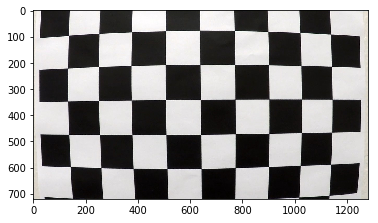

In [6]:
img = mpimg.imread("camera_cal/calibration1.jpg")
plt.imshow(img)

In [7]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
objpoints,imgpoints = cal_camera_para(images_dir, 9, 6)
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

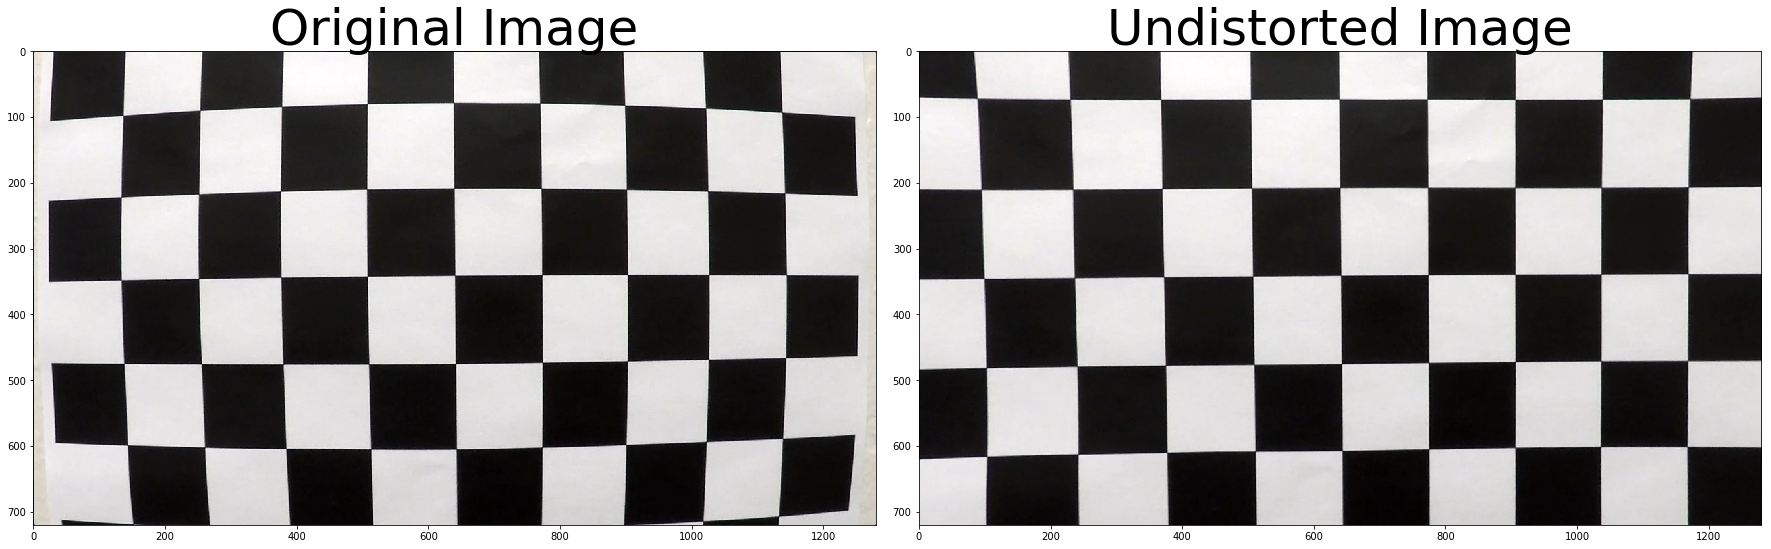

In [8]:
#mtx, dist = cal_camera(img, 9, 6)
undist = cv2.undistort(img, mtx, dist, None, mtx)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(undist)
ax2.set_title('Undistorted Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

## Correct image distortion 

In [9]:
import os
os.listdir("test_images/")

['challenge_video_Moment.jpg',
 'straight_lines1.jpg',
 'straight_lines2.jpg',
 'test1.jpg',
 'test2.jpg',
 'test3.jpg',
 'test4.jpg',
 'test5.jpg',
 'test6.jpg']

True

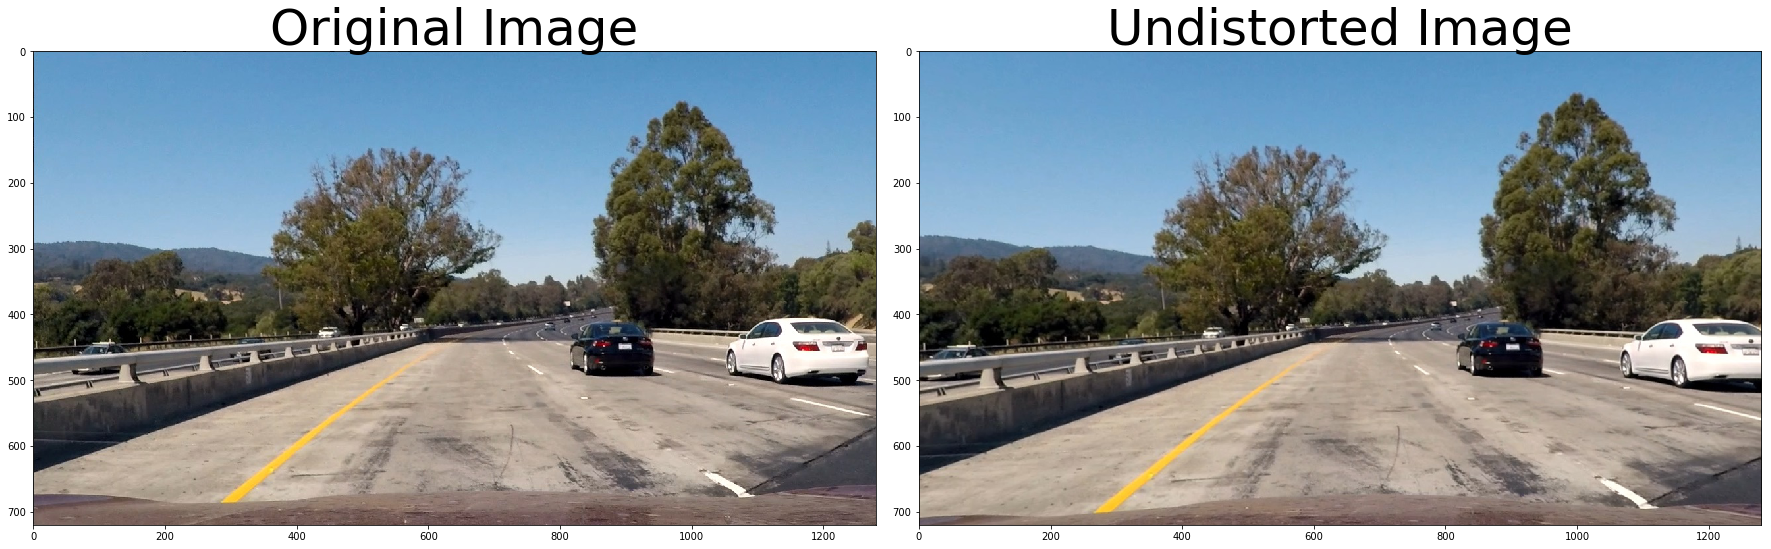

In [10]:
lane_img = mpimg.imread("test_images/test1.jpg")
undist = cv2.undistort(lane_img, mtx, dist, None, mtx)
#plt.imshow(undist)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(lane_img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(undist)
ax2.set_title('Undistorted Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
cv2.imwrite("output_images/undist_test4.jpg", undist)

## Use color transforms, gradients, etc., to create a thresholded binary image.

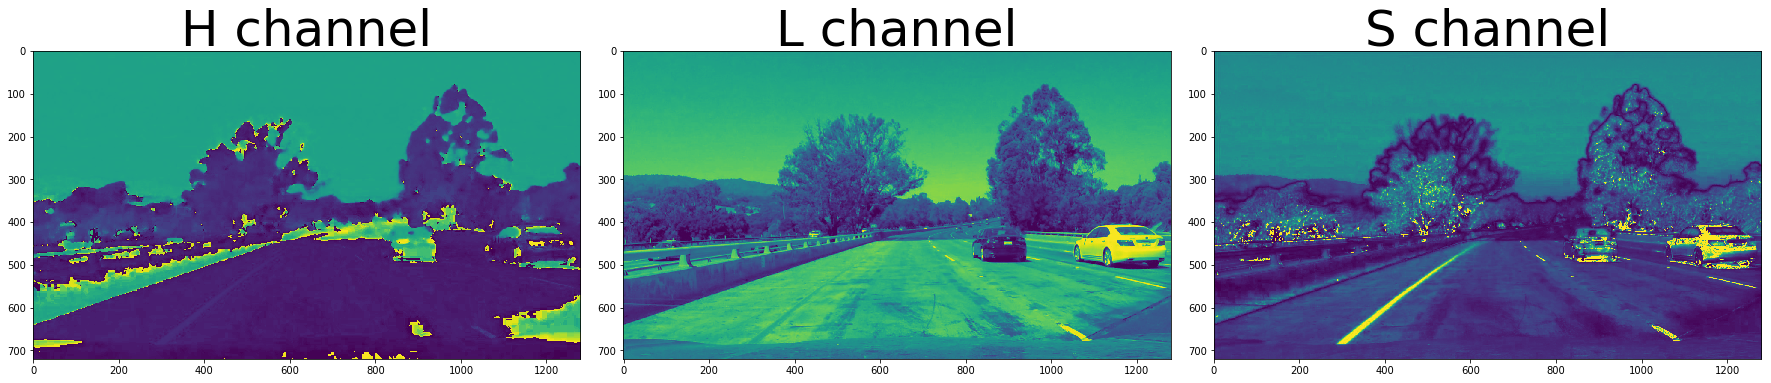

In [11]:
hls = cv2.cvtColor(lane_img, cv2.COLOR_RGB2HLS)
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 9))
f.tight_layout()
ax1.imshow(hls[:,:,0])
ax1.set_title('H channel', fontsize=50)
ax2.imshow(hls[:,:,1])
ax2.set_title('L channel', fontsize=50)
ax3.imshow(hls[:,:,2])
ax3.set_title('S channel', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

In [12]:
# Define a function that applies Sobel x and y, 
# then computes the direction of the gradient
# and applies a threshold.
def dir_threshold(img, sobel_kernel=3, thresh=(0, np.pi/2)):
    
    # Apply the following steps to img
    # 1) Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    # 2) Take the gradient in x and y separately
    sobel_x = cv2.Sobel(gray,cv2.CV_64F,1,0,ksize=sobel_kernel)
    sobel_y = cv2.Sobel(gray,cv2.CV_64F,0,1,ksize=sobel_kernel)
    
    # 3) Take the absolute value of the x and y gradients
    abs_sobel_x = np.absolute(sobel_x)
    abs_sobel_y = np.absolute(sobel_y)
    
    # 4) Use np.arctan2(abs_sobely, abs_sobelx) to calculate the direction of the gradient 
    dir_gradient =  np.arctan2(abs_sobel_y, abs_sobel_x)
    
    # 5) Create a binary mask where direction thresholds are met
    binary_output = np.zeros_like(dir_gradient)
    
    # 6) Return this mask as your binary_output image
    binary_output[(dir_gradient >= thresh[0]) & (dir_gradient <= thresh[1])] = 1
    
    return binary_output

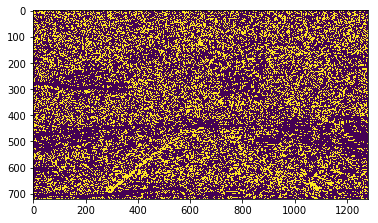

In [17]:
#img_binary = pipeline(undist,s_thresh=(200,255), sx_thresh=(50,100))
img_binary = dir_threshold(undist,25, thresh=(1.2, 1.2))

plt.imshow(img_binary)

In [14]:
# Define a function that applies Sobel x or y, 
# then takes an absolute value and applies a threshold.
# Note: calling your function with orient='x', thresh_min=5, thresh_max=100
# should produce output like the example image shown above this quiz.
def abs_sobel_thresh(img, orient='x', thresh_min=0, thresh_max=255):
    
    # Apply the following steps to img
    # 1) Convert to grayscale
    gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    
    # 2) Take the derivative in x or y given orient = 'x' or 'y'
    if orient == 'y':
        sobel = cv2.Sobel(gray, cv2.CV_64F, 0, 1)
    else:
        sobel = cv2.Sobel(gray, cv2.CV_64F, 1, 0)
    
    # 3) Take the absolute value of the derivative or gradient
    abs_sobel = np.absolute(sobel)
    
    # 4) Scale to 8-bit (0 - 255) then convert to type = np.uint8
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))
    
    # 5) Create a mask of 1's where the scaled gradient magnitude 
            # is > thresh_min and < thresh_max
    binary_output = np.zeros_like(scaled_sobel)
    binary_output[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 1
    # 6) Return this mask as your binary_output image
    #binary_output = np.copy(img) # Remove this line
    return binary_output


In [84]:
# Define a function that applies Sobel x and y, 
# then computes the magnitude of the gradient
# and applies a threshold
def mag_thresh(img, sobel_kernel=3, mag_thresh=(0, 255)):
    
    # Apply the following steps to img
    # 1) Convert to grayscale
    gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    
    # 2) Take the gradient in x and y separately
    sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    
    # 3) Calculate the magnitude 
    magnitude = np.sqrt((sobel_x**2) + (sobel_y**2))
    
    # 4) Scale to 8-bit (0 - 255) and convert to type = np.uint8
    scaled_sobel = np.uint8(255*magnitude/np.max(magnitude))
    
    # 5) Create a binary mask where mag thresholds are met
    binary_output = np.zeros_like(scaled_sobel)
    
    
    # 6) Return this mask as your binary_output image
    binary_output[(scaled_sobel >= mag_thresh[0]) & (scaled_sobel <= mag_thresh[1])] = 1
    return binary_output

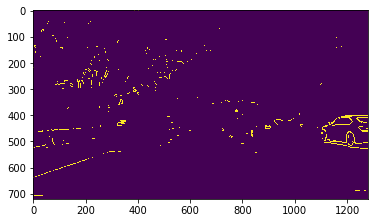

In [93]:
img_binary = mag_thresh(undist,13, mag_thresh=(100,255))

plt.imshow(img_binary)

In [10]:
def lab_bthresh(img, thresh=(190,255)):
    # 1) Convert to LAB color space
    lab = cv2.cvtColor(img, cv2.COLOR_RGB2Lab)
    lab_b = lab[:,:,2]
    # don't normalize if there are no yellows in the image
    if np.max(lab_b) > 175:
        lab_b = lab_b*(255/np.max(lab_b))
    # 2) Apply a threshold to the L channel
    binary_output = np.zeros_like(lab_b)
    binary_output[((lab_b > thresh[0]) & (lab_b <= thresh[1]))] = 1
    # 3) Return a binary image of threshold result
    return binary_output

In [11]:
# Define a function that thresholds the L-channel of HLS
# Use exclusive lower bound (>) and inclusive upper (<=)
def hls_lthresh(img, thresh=(220, 255)):
    # 1) Convert to HLS color space
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    hls_l = hls[:,:,1]
    hls_l = hls_l*(255/np.max(hls_l))
    # 2) Apply a threshold to the L channel
    binary_output = np.zeros_like(hls_l)
    binary_output[(hls_l > thresh[0]) & (hls_l <= thresh[1])] = 1
    # 3) Return a binary image of threshold result
    return binary_output

In [99]:
# Use hls & x sobel to create a pipeline.
def pipeline(img, s_thresh=(170, 255), sx_thresh=(20, 100)):
    img = np.copy(img)
    # Convert to HLS color space and separate the V channel
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    #l_channel = hls[:,:,1]
    s_channel = hls[:,:,2]
    # Sobel x
    sobelx = cv2.Sobel(s_channel, cv2.CV_64F, 1, 0) # Take the derivative in x
    abs_sobelx = np.absolute(sobelx) # Absolute x derivative to accentuate lines away from horizontal
    scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))
    
    # Threshold x gradient
    sxbinary = np.zeros_like(scaled_sobel)
    sxbinary[(scaled_sobel >= sx_thresh[0]) & (scaled_sobel <= sx_thresh[1])] = 1
    
    # Threshold color channel
    s_binary = np.zeros_like(s_channel)
    s_binary[(s_channel >= s_thresh[0]) & (s_channel <= s_thresh[1])] = 1
    # Stack each channel
    color_binary = np.dstack(( np.zeros_like(sxbinary), sxbinary, s_binary)) * 255
    #color_binary = sxbinary | s_binary
    return color_binary

In [12]:
def pipeline2(img):

    # HLS L-channel Threshold (using default parameters)
    img_LThresh = hls_lthresh(img)

    # Lab B-channel Threshold (using default parameters)
    img_BThresh = lab_bthresh(img)
    
    # Combine HLS and Lab B channel thresholds
    combined = np.zeros_like(img_BThresh)
    combined[(img_LThresh == 1) | (img_BThresh == 1)] = 1
    return combined
    

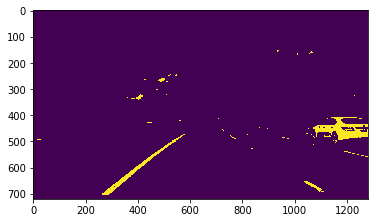

In [13]:
#img_binary = pipeline(undist,s_thresh=(200,255), sx_thresh=(50,100))
img_binary = pipeline2(undist)

plt.imshow(img_binary)

## Apply a perspective transform to rectify binary image ("birds-eye view").

In [14]:
def compute_warp_mtx(src, dst):
    M1 = cv2.getPerspectiveTransform(src, dst)
    M2 = cv2.getPerspectiveTransform(dst, src)
    return M1,M2
    

In [15]:
def warp_img(img, wrap_mtx):
    img_size = (img.shape[1],img.shape[0])
    warped = cv2.warpPerspective(img, wrap_mtx, img_size, flags=cv2.INTER_LINEAR)
    return warped

In [16]:
h,w = undist.shape[:2]

src = np.float32(
        [
            (727,476),
            (1050,689),
            (272,689),
            (560,476)
        ])
dst = np.float32(
        [
            (w-450,0),
            (w-450,h),
            (450,h),
            (450,0)
        ])

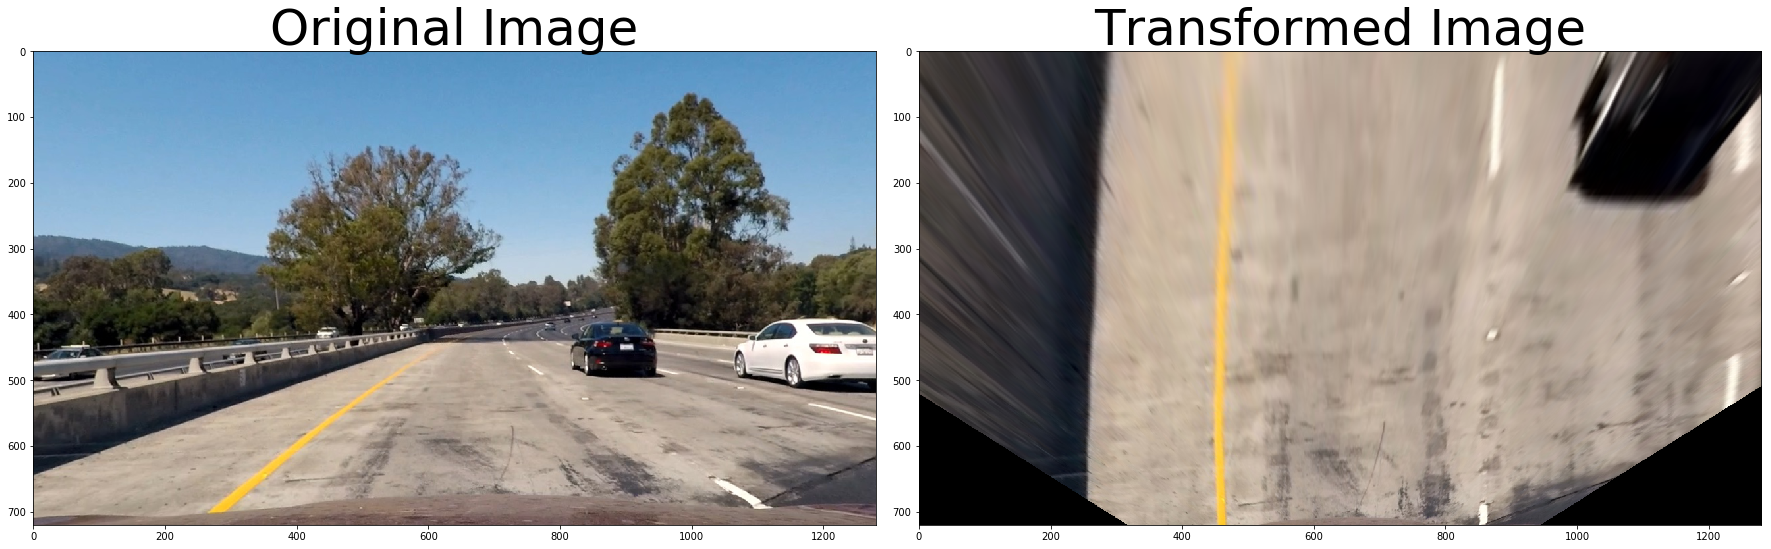

In [17]:
#test tranform
tran_mtx, tran_mtx_back = compute_warp_mtx(src,dst)
tran_img = warp_img(undist, tran_mtx)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(undist)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(tran_img)
ax2.set_title('Transformed Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)


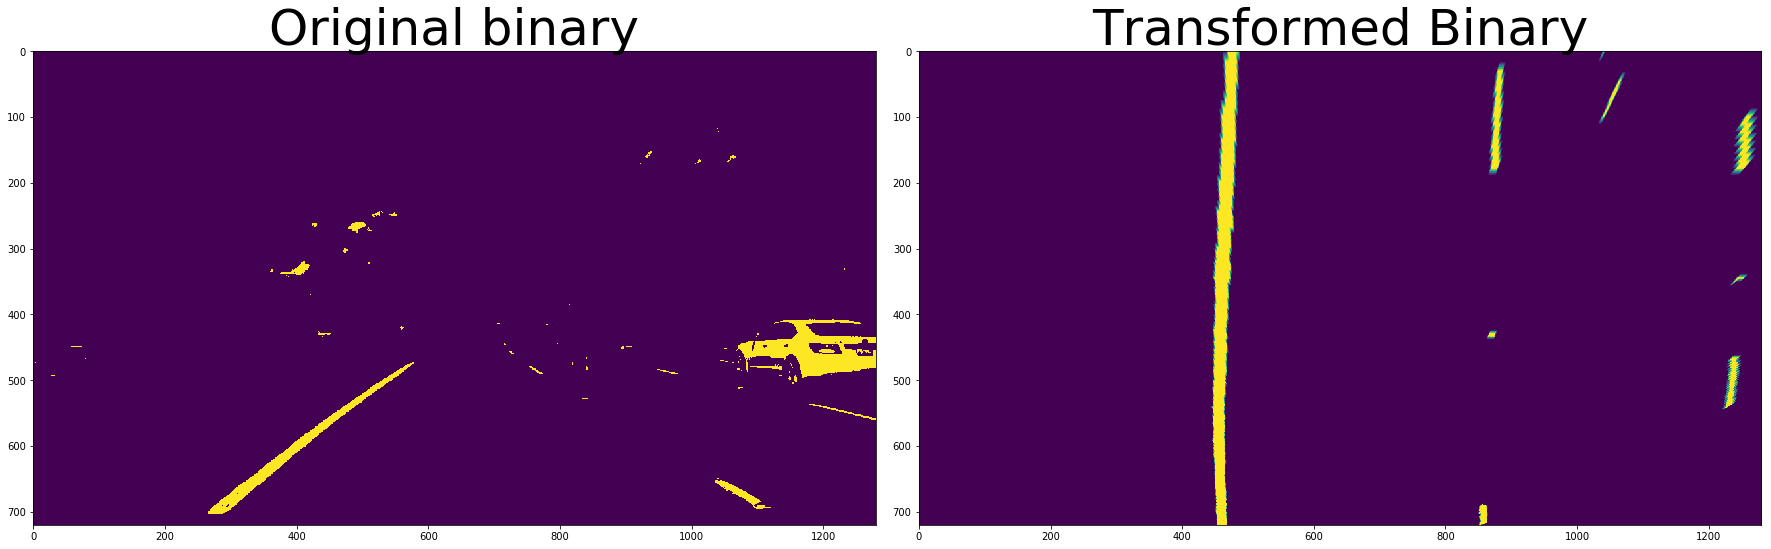

In [18]:
#transform binary
tran_bin = warp_img(img_binary, tran_mtx)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img_binary)
ax1.set_title('Original binary', fontsize=50)
ax2.imshow(tran_bin)
ax2.set_title('Transformed Binary', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

## Detect lane pixels and fit to find the lane boundary.

In [19]:
def fit_poly(binary_warped, left_lane_inds, right_lane_inds):

    img_shape = binary_warped.shape
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    
    # Extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds]
    
    #Fit a second order polynomial to each with np.polyfit()
    left_fit = np.polyfit(lefty,leftx,2)
    right_fit = np.polyfit(righty,rightx,2)
    
    # Generate x and y values for plotting
    ploty = np.linspace(0, img_shape[0]-1, img_shape[0])
    # Calc both polynomials using ploty, left_fit and right_fit
    left_fitx = left_fit[0] * ploty**2 + left_fit[1] * ploty + left_fit[2]
    right_fitx = right_fit[0] * ploty**2 + right_fit[1] * ploty + right_fit[2]
    
    return left_fitx, right_fitx, ploty, left_fit, right_fit

In [20]:
# search lane lines
def find_lane_pixels(binary_warped):
    # Take a histogram of the bottom half of the image
    #histogram = np.sum(binary_warped[binary_warped.shape[0]//2:,:], axis=0)
    histogram = np.sum(binary_warped, axis=0)

    # Find the peak of the left and right halves of the histogram
    # These will be the starting point for the left and right lines
    midpoint = np.int(histogram.shape[0]//2)
    leftx_base = np.argmax(histogram[:midpoint])
    rightx_base = np.argmax(histogram[midpoint:]) + midpoint

    # HYPERPARAMETERS
    # Choose the number of sliding windows
    nwindows = 9
    # Set the width of the windows +/- margin
    margin = 100
    # Set minimum number of pixels found to recenter window
    minpix = 50

    # Set height of windows - based on nwindows above and image shape
    window_height = np.int(binary_warped.shape[0]//nwindows)

    # Current positions to be updated later for each window in nwindows
    leftx_current = leftx_base
    rightx_current = rightx_base

    # Create empty lists to receive left and right lane pixel indices
    left_lane_inds = []
    right_lane_inds = []
    rectangles = []

    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])

    # Step through the windows one by one
    for window in range(nwindows):
        # Identify window boundaries in x and y (and right and left)
        win_y_low = binary_warped.shape[0] - (window+1)*window_height
        win_y_high = binary_warped.shape[0] - window*window_height
        ### TO-DO: Find the four below boundaries of the window ###
        win_xleft_low = leftx_current-margin  # Update this
        win_xleft_high = leftx_current+margin   # Update this
        win_xright_low = rightx_current-margin  # Update this
        win_xright_high = rightx_current+margin   # Update this
        
        # store the windows on the visualization image
        rectangles.append(((win_xleft_low,win_y_low),(win_xleft_high,win_y_high)))
        rectangles.append(((win_xright_low,win_y_low),(win_xright_high,win_y_high)))
        #cv2.rectangle(out_img,(win_xleft_low,win_y_low),(win_xleft_high,win_y_high),(0,255,0), 2) 
        #cv2.rectangle(out_img,(win_xright_low,win_y_low),(win_xright_high,win_y_high),(0,255,0), 2) 
        
        ### TO-DO: Identify the nonzero pixels in x and y within the window ###
        good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
        (nonzerox >= win_xleft_low) &  (nonzerox < win_xleft_high)).nonzero()[0]
        good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
        (nonzerox >= win_xright_low) &  (nonzerox < win_xright_high)).nonzero()[0]
        
        # Append these indices to the lists
        left_lane_inds.append(good_left_inds)
        right_lane_inds.append(good_right_inds)
        
        
        ### TO-DO: If you found > minpix pixels, recenter next window ###
        ### (`right` or `leftx_current`) on their mean position ###
        #pass # Remove this when you add your function
        if len(good_left_inds) > minpix:
            leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
        if len(good_right_inds) > minpix:        
            rightx_current = np.int(np.mean(nonzerox[good_right_inds]))
            
    # Concatenate the arrays of indices (previously was a list of lists of pixels)
    try:
        left_lane_inds = np.concatenate(left_lane_inds)
        right_lane_inds = np.concatenate(right_lane_inds)
    except ValueError:
        # Avoids an error if the above is not implemented fully
        return None,None,None
    
    
    return left_lane_inds, right_lane_inds, rectangles


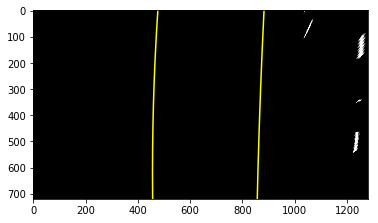

In [21]:
#left_lane_inds, right_lane_inds, left_fit, right_fit,rectangles = find_lane_pixels_and_fit(tran_bin)
left_lane_inds, right_lane_inds,rectangles = find_lane_pixels(tran_bin)

# Create an output image to draw on and visualize the result
out_img = np.dstack((tran_bin, tran_bin, tran_bin))

left_fitx, right_fitx, ploty, left_fit, right_fit = fit_poly(tran_bin, left_lane_inds, right_lane_inds)

nonzero = tran_bin.nonzero()
nonzeroy = np.array(nonzero[0])
nonzerox = np.array(nonzero[1])

# Extract left and right line pixel positions
leftx = nonzerox[left_lane_inds]
lefty = nonzeroy[left_lane_inds] 
rightx = nonzerox[right_lane_inds]
righty = nonzeroy[right_lane_inds]

#draw find pixels
out_img[lefty, leftx] = [255, 0, 0]
out_img[righty, rightx] = [0, 0, 255]

#draw retangles
for rectangel in rectangles:
    cv2.rectangle(out_img,rectangel[0],rectangel[1],(0,255,0), 2) 


#draw fit lines
plt.plot(left_fitx, ploty, color='yellow')
plt.plot(right_fitx, ploty, color='yellow')
    
plt.imshow(out_img)

In [22]:
# search around

def search_around_poly(binary_warped, pre_left_fit, pre_right_fit):
    # HYPERPARAMETER
    # Choose the width of the margin around the previous polynomial to search
    # The quiz grader expects 100 here, but feel free to tune on your own!
    margin = 100

    # Grab activated pixels
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    
    ### TO-DO: Set the area of search based on activated x-values ###
    ### within the +/- margin of our polynomial function ###
    ### Hint: consider the window areas for the similarly named variables ###
    ### in the previous quiz, but change the windows to our new search area ###
    left_lane_inds = ((nonzerox > (pre_left_fit[0]*(nonzeroy**2) + pre_left_fit[1]*nonzeroy + 
                    pre_left_fit[2] - margin)) & (nonzerox < (pre_left_fit[0]*(nonzeroy**2) + 
                    pre_left_fit[1]*nonzeroy + pre_left_fit[2] + margin)))
    right_lane_inds = ((nonzerox > (pre_right_fit[0]*(nonzeroy**2) + pre_right_fit[1]*nonzeroy + 
                    pre_right_fit[2] - margin)) & (nonzerox < (pre_right_fit[0]*(nonzeroy**2) + 
                    pre_right_fit[1]*nonzeroy + pre_right_fit[2] + margin)))

                                 
    return left_lane_inds, right_lane_inds





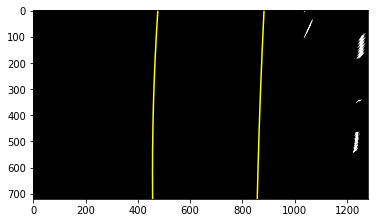

In [23]:
left_lane_inds, right_lane_inds = search_around_poly(tran_bin, left_fit, right_fit)
 # Create an output image to draw on and visualize the result
out_img = np.dstack((tran_bin, tran_bin, tran_bin))

left_fitx, right_fitx, ploty, left_fit, right_fit = fit_poly(tran_bin, left_lane_inds, right_lane_inds)


nonzero = tran_bin.nonzero()
nonzeroy = np.array(nonzero[0])
nonzerox = np.array(nonzero[1])

# Extract left and right line pixel positions
leftx = nonzerox[left_lane_inds]
lefty = nonzeroy[left_lane_inds] 
rightx = nonzerox[right_lane_inds]
righty = nonzeroy[right_lane_inds]

#draw find pixels
out_img[lefty, leftx] = [255, 0, 0]
out_img[righty, rightx] = [0, 0, 255]

#draw fit lines
plt.plot(left_fitx, ploty, color='yellow')
plt.plot(right_fitx, ploty, color='yellow')
    
plt.imshow(out_img)

## Determine the curvature of the lane and vehicle position with respect to center.

In [24]:
def measure_curvature_and_offset(bin_img, left_fit_cr, right_fit_cr):
    '''
    Calculates the curvature of polynomial functions in meters.
    '''
    # Define conversions in x and y from pixels space to meters
    ym_per_pix = 30/720 # meters per pixel in y dimension
    xm_per_pix = 3.7/700 # meters per pixel in x dimension
    
    height = bin_img.shape[0]
    ploty = np.linspace(0, height-1, height)
    
    # Define y-value where we want radius of curvature
    # We'll choose the maximum y-value, corresponding to the bottom of the image
    y_eval = np.max(ploty)
    
    #Implement the calculation of R_curve (radius of curvature) #####
    left_curverad = ((1 + (2*left_fit_cr[0]*y_eval*ym_per_pix + left_fit_cr[1])**2)**1.5) / np.absolute(2*left_fit_cr[0])
    right_curverad = ((1 + (2*right_fit_cr[0]*y_eval*ym_per_pix + right_fit_cr[1])**2)**1.5) / np.absolute(2*right_fit_cr[0])

    center = bin_img.shape[1]/2
    left_loc = left_fit_cr[0]*height**2 + left_fit_cr[1]*height + left_fit_cr[2]
    ritht_loc = right_fit_cr[0]*height**2 + right_fit_cr[1]*height + right_fit_cr[2]
    lane_center = (left_loc + ritht_loc) /2
    offset = (center - lane_center) * xm_per_pix
    
    return left_curverad, right_curverad, offset

In [30]:
left_curverad, right_curverad, offset = measure_curvature_and_offset(tran_bin, left_fit, right_fit)
print('Radius of curvature for example:', left_curverad, 'm,', right_curverad, 'm')
print('Distance from lane center for example:', offset, 'm')

Radius of curvature for example: 9431.20954689 m, 26995.5648741 m
Distance from lane center for example: -0.0878809974168 m


## Warp the detected lane boundaries back onto the original image.

In [25]:
#drraw lane lines
def draw_lane_lines(original_img, binary_img, left_fit, right_fit, mtx):
    #copy image
    img_copy = np.copy(original_img)
 
   # Create an image to draw the lines on
    warp_bin = np.zeros_like(binary_img).astype(np.uint8)
    warp_img = np.dstack((warp_bin, warp_bin, warp_bin))
  
    height,width = binary_img.shape
    ploty = np.linspace(0, height-1, height)# to cover same y-range as image
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
  
    # create lane area
    left_line = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
    ritht_line = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])
    lane_area = np.hstack((left_line, ritht_line))

    # Draw the lane area
    cv2.fillPoly(warp_img, np.int_([lane_area]), (0,255, 0))
    # Draw left lane line
    cv2.polylines(warp_img, np.int32([left_line]), isClosed=False, color=(255,0,255), thickness=15)
    # Draw right lane line
    cv2.polylines(warp_img, np.int32([ritht_line]), isClosed=False, color=(0,255,255), thickness=15)
    
    # Warp back to original image space using inverse perspective matrix 
    warp_back = cv2.warpPerspective(warp_img, mtx, (width, height)) 
    # Combine the result with the original image
    result = cv2.addWeighted(img_copy, 1, warp_back, 0.5, 0)
    return result
    

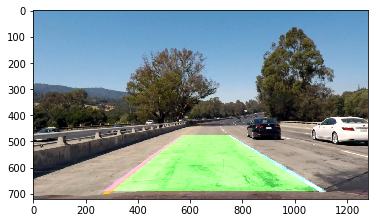

In [26]:

result = draw_lane_lines(undist, tran_bin, left_fit, right_fit, tran_mtx_back)
plt.imshow(result)

## Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

Curve radius: 18213.39m


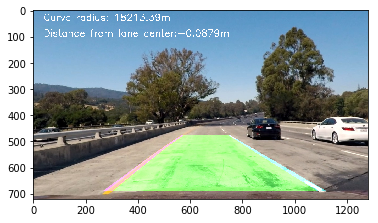

In [31]:
font=cv2.FONT_HERSHEY_SIMPLEX
print('Curve radius: {:04.2f}m'.format((left_curverad+right_curverad)/2))
result_1=cv2.putText(result,'Curve radius: {:04.2f}m'.format((left_curverad+right_curverad)/2),(40,40),font,1.2,(255,255,255),2)
result_1=cv2.putText(result_1,'Distance from lane center:{:04.4f}m'.format(offset),(40,100),font,1.2,(255,255,255),2)
plt.imshow(result)

In [28]:
def write_data(img, curverad, offset):
    img_curve = np.copy(img)
    img_curve =cv2.putText(img_curve,'Radius of Curvature = {:04.2f}m'.format((left_curverad+right_curverad)/2),(40,40),font,1.2,(255,255,255),2)
    
    direction = 'left'
    if offset > 0:
        direction = 'right'
        
    img_result = cv2.putText(img_curve,'Vehicle is {:04.2f}m {} of center'.format(offset,direction),(40,100),font,1.2,(255,255,255),2)
    
    return img_result

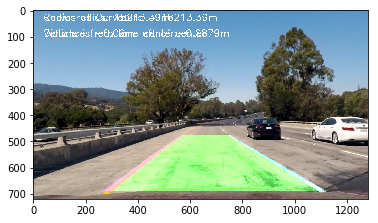

In [32]:
test_data_write = write_data(result, (left_curverad+right_curverad)/2, offset)
plt.imshow(test_data_write)

## Define Class Line()

In [43]:
# Define a class to receive the characteristics of each line detection
class Line():
    def __init__(self):
        # was the line detected in the last iteration?
        self.detected = False  
        # x values of the last n fits of the line
        self.recent_xfitted = [] 
        #average x values of the fitted line over the last n iterations
        self.bestx = None     
        #polynomial coefficients averaged over the last n iterations
        self.best_fit = None  
        #polynomial coefficients for the most recent fit
        self.current_fit = []  
        #radius of curvature of the line in some units
        self.radius_of_curvature = None 
        #distance in meters of vehicle center from the line
        self.line_base_pos = None 
        #difference in fit coefficients between last and new fits
        self.diffs = np.array([0,0,0], dtype='float') 
        #x values for detected line pixels
        self.allx = None  
        #y values for detected line pixels
        self.ally = None
        #last n iterations
        self.lastn = 5
        
    def update(self, fit, inds):
        
        #if any line detected
        if fit == None:
            self.detected = False
            # we should drop oldest one to ensure using lastest ones
            if len(self.current_fit) > 0:
                self.current_fit = self.current_fit[1:]
                
            if len(self.current_fit) > 0:
                self.best_fit = np.average(self.current_fit, axis=0)
                
        else:
            self.detected = True
            self.current_fit.append(fit)
            if len(self.current_fit) > self.lastn:
                # remain only lastn records
                self.current_fit = self.current_fit[len(self.current_fit)-self.lastn:]
            self.best_fit = np.average(self.current_fit, axis=0)
        
    def set_last_n(self, n):   
        self.lastn = n
        
    def is_detected(self):
        return self.detected
            
        

## Create a func process_image() 

In [34]:
#calibrate camera
img = mpimg.imread("camera_cal/calibration1.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
objpoints,imgpoints = cal_camera_para(images_dir, 9, 6)
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

In [35]:
#compute transform mtx
h,w = undist.shape[:2]

src = np.float32(
        [
            (727,476),
            (1050,689),
            (272,689),
            (560,476)
        ])
dst = np.float32(
        [
            (w-450,0),
            (w-450,h),
            (450,h),
            (450,0)
        ])
tran_mtx, tran_mtx_back = compute_warp_mtx(src,dst)

In [49]:
def process_image(img):
    #copy img
    img_copy = np.copy(img)
    #undist image
    img_undist = cv2.undistort(img_copy, mtx, dist, None, mtx)
    #create image binary
    img_bin = pipeline2(img_undist)
    #transform image binary
    img_bin_tran = warp_img(img_bin, tran_mtx)


    if l_line.is_detected() and r_line.is_detected(): 
        left_lane_inds, right_lane_inds = search_around_poly(img_bin_tran, l_line.best_fit, r_line.best_fit)
    else:
        left_lane_inds, right_lane_inds, rectangles = find_lane_pixels(img_bin_tran)
        
    left_lane_inds, right_lane_inds, rectangles = find_lane_pixels(img_bin_tran)

    #left_lane_inds, right_lane_inds, rectangles = find_lane_pixels(img_bin_tran)

    #get fit and points
    left_fitx, right_fitx, ploty, left_fit, right_fit = fit_poly(img_bin_tran, left_lane_inds, right_lane_inds)
    
    #update lines
    l_line.update(left_fit, left_lane_inds)
    r_line.update(right_fit, right_lane_inds)
    
    #compute curverate and offset
    left_curverad, right_curverad, offset = measure_curvature_and_offset(img_bin_tran,  l_line.best_fit, r_line.best_fit)
    
    #draw lane lines
    img_lane = draw_lane_lines(img_undist, img_bin_tran,  l_line.best_fit, r_line.best_fit, tran_mtx_back)
    
    #write data
    img_result = write_data(img_lane, (left_curverad+right_curverad)/2, offset)
    
    return img_result
    
        

In [46]:
import os
os.listdir("test_images/")

['straight_lines1.jpg',
 'straight_lines2.jpg',
 'test1.jpg',
 'test2.jpg',
 'test3.jpg',
 'test4.jpg',
 'test5.jpg',
 'test6.jpg']

C:\Users\wpyro\AppData\Local\conda\conda\envs\carnd-term1\lib\site-packages\ipykernel_launcher.py:30: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


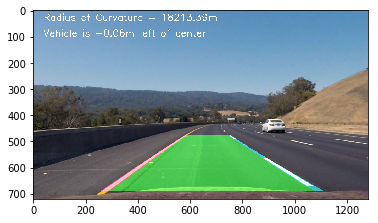

In [45]:
l_line = Line()
r_line = Line()
img_test = mpimg.imread("test_images/test3.jpg")
img_test_out = process_image(img_test)
plt.imshow(img_test_out)

## Test vedios

In [46]:
from moviepy.editor import VideoFileClip
from IPython.display import HTML

In [50]:
l_line = Line()
r_line = Line()
vedio_output = 'project_video_output.mp4'
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
##clip1 = VideoFileClip("test_videos/solidWhiteRight.mp4").subclip(0,5)
clip1 = VideoFileClip("project_video.mp4")
test_clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!
%time test_clip.write_videofile(vedio_output, audio=False)

[MoviePy] >>>> Building video project_video_output.mp4
[MoviePy] Writing video project_video_output.mp4


100%|█████████████████████████████████████████████████████████████████████████████▉| 1260/1261 [02:40<00:00,  7.85it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: project_video_output.mp4 

Wall time: 2min 41s


In [51]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(vedio_output))

In [115]:
l_line = Line()
r_line = Line()
#my_clip.write_gif('test.gif', fps=12)
video_output1 = 'project_video_output.mp4'
video_input1 = VideoFileClip('project_video.mp4')#.subclip(22,26)
processed_video = video_input1.fl_image(process_image)
%time processed_video.write_videofile(video_output1, audio=False)

NameError: name 'VideoFileClip' is not defined